In [42]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 5000)
import warnings
warnings.filterwarnings("ignore")

In [2]:
responses_df_2021 = pd.read_csv("kaggle_survey_2021_responses.csv")

In [3]:
nigeria = responses_df_2021[responses_df_2021["Q3"] =="Nigeria"]

In [4]:
age_ng = nigeria["Q1"].value_counts(normalize=True) 
age_ng = age_ng.mul(100)
age_ng = age_ng.round(decimals=1)
age_ng = pd.DataFrame(data=age_ng)
age_ng.reset_index(inplace=True)
age_ng.columns = ["age","percentage (%)"] 
age_ng.sort_values(by="age", inplace=True)


fig = px.bar(age_ng, x="age", y="percentage (%)", text='percentage (%)', 
             title="Age of Nigerian Kagglers", orientation="v")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color="green", ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()

In [5]:
age_ng

,age,percentage (%)
4,18-21,12.4
1,22-24,18.5
0,25-29,29.5
2,30-34,16.4
3,35-39,13.7
5,40-44,6.0
6,45-49,2.7
7,50-54,0.6
8,60-69,0.3


In [6]:
age_ng_2 = nigeria["Q1"].value_counts(normalize=True).mul(100).round(decimals=1).reset_index()

age_ng_2.columns = ["age","percentage (%)"] 

age_ng_2.sort_values(by="age", inplace=True)

age_ng_2

,age,percentage (%)
4,18-21,12.4
1,22-24,18.5
0,25-29,29.5
2,30-34,16.4
3,35-39,13.7
5,40-44,6.0
6,45-49,2.7
7,50-54,0.6
8,60-69,0.3


In [7]:
def count_then_percent_2(dataframe_2, col_name):
    """
    A helper function to return value counts as percentage.
    """
    percentage_2 = dataframe_2[col_name].value_counts(normalize=True).mul(100).round(decimals=1).reset_index()
    
    return percentage_2

In [8]:
count_then_percent_2(nigeria, "Q1")

,index,Q1
0,25-29,29.5
1,22-24,18.5
2,30-34,16.4
3,35-39,13.7
4,18-21,12.4
5,40-44,6.0
6,45-49,2.7
7,50-54,0.6
8,60-69,0.3


In [9]:
age_ng_3 = count_then_percent_2(nigeria, "Q1")

In [10]:
fig = px.bar(age_ng_3, x="index", y="Q1", text='Q1', 
             title="Age of Nigerian Kagglers", orientation="v")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color="green", ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()

In [11]:
def count_then_return_percent(dataframe,column_name):
    '''
    A helper function to return value counts as percentages.
    '''
    counts = dataframe[column_name].value_counts(dropna=False)
    percentages = round(counts*100/(dataframe[column_name].count()),1)
    return percentages

In [12]:
def plotly_bar_chart(response_counts,title,y_axis_title,orientation):
    '''
    This function creates a bar chart.
    '''
    response_counts_series = pd.Series(response_counts)
    fig = px.bar(response_counts_series,
             labels={"index": '',"value": y_axis_title},
             text=response_counts_series.values,
             orientation=orientation,)
    fig.update_layout(showlegend=False,
                      title={'text': title+' in 2021',
                             'y':0.95,
                             'x':0.5,})
    fig.show()

In [13]:
question_name = 'Q1'
percentages = count_then_return_percent(responses_df_2021,question_name).sort_index()
title_for_chart = 'Age Distributions on Kaggle'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [14]:
percentages

18-21                          18.9
22-24                          18.1
25-29                          19.0
30-34                          13.2
35-39                           9.6
40-44                           7.3
45-49                           5.3
50-54                           3.7
55-59                           2.3
60-69                           2.1
70+                             0.5
What is your age (# years)?     0.0
Name: Q1, dtype: float64

In [15]:
age_ng = nigeria["Q1"].value_counts(normalize=True) 
age_ng = age_ng.mul(100)
age_ng = age_ng.round(decimals=1)
age_ng = pd.DataFrame(data=age_ng)
age_ng.reset_index(inplace=True)
age_ng.columns = ["age","percentage (%)"] 
age_ng.sort_values(by="age", inplace=True)


fig = px.bar(age_ng, y="age", x="percentage (%)", text='percentage (%)', 
             title="Age of Nigerian Kagglers", orientation="h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color="green", ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()

In [16]:
def sort_dictionary_by_percent(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question): 
    ''' 
    A helper function that can be used to sort a dictionary.   
    It is an adaptation of a similar function
    from https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science.
    '''
    dictionary = count_then_return_percent_for_multiple_column_questions(dataframe,
                                                                list_of_columns_for_a_single_question,
                                                                dictionary_of_counts_for_a_single_question)
    dictionary = {v:k    for(k,v) in dictionary.items()}
    list_tuples = sorted(dictionary.items(), reverse=False) 
    dictionary = {v:k for (k,v) in list_tuples}   
    return dictionary

In [17]:
q7_dictionary_of_counts_2021 = {
    'Python' : (responses_df_2021['Q7_Part_1'].count()),
    'R': (responses_df_2021['Q7_Part_2'].count()),
    'SQL' : (responses_df_2021['Q7_Part_3'].count()),
    'C' : (responses_df_2021['Q7_Part_4'].count()),
    'C++' : (responses_df_2021['Q7_Part_5'].count()),
    'Java' : (responses_df_2021['Q7_Part_6'].count()),
    'Javascript' : (responses_df_2021['Q7_Part_7'].count()),
    'Julia' : (responses_df_2021['Q7_Part_8'].count()),
    'Swift' : (responses_df_2021['Q7_Part_9'].count()),
    'Bash' : (responses_df_2021['Q7_Part_10'].count()),
    'MATLAB' : (responses_df_2021['Q7_Part_11'].count()),
    'None' : (responses_df_2021['Q7_Part_12'].count()),
    'Other' : (responses_df_2021['Q7_OTHER'].count())
}

In [18]:
q7_list_of_columns_2021 = ['Q7_Part_1',
                      'Q7_Part_2',
                      'Q7_Part_3',
                      'Q7_Part_4',
                      'Q7_Part_5',
                      'Q7_Part_6',
                      'Q7_Part_7',
                      'Q7_Part_8',
                      'Q7_Part_9',
                      'Q7_Part_10',
                      'Q7_Part_11',
                      'Q7_Part_12',
                      'Q7_OTHER']

In [19]:
def count_then_return_percent_for_multiple_column_questions(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question):
    '''
    A helper function to convert counts to percentages.
    '''
    df = dataframe
    subset = list_of_columns_for_a_single_question
    df = df[subset]
    df = df.dropna(how='all')
    total_count = len(df) 
    dictionary = dictionary_of_counts_for_a_single_question
    for i in dictionary:
        dictionary[i] = round(float(dictionary[i]*100/total_count),1)
    return dictionary 

In [20]:
question_name = 'Q7'
dictionary_of_counts = sort_dictionary_by_percent(responses_df_2021,
                                                  q7_list_of_columns_2021,
                                                  q7_dictionary_of_counts_2021)
title_for_chart = 'Most Popular Progamming Languages'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [21]:


prog_lang_ng = pd.DataFrame(nigeria.loc[:,list(nigeria.columns[7:20])].count(), columns=["count"])
prog_lang_ng["programming language"] = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 
                'Javascript', 'Julia', 'Swift','Bash', 'MATLAB', 'None', 'Other']
prog_lang_ng.sort_values(by = "count", inplace = True, ascending = False)

prog_lang_ng["percentage (%)"] = (prog_lang_ng["count"]/
                              prog_lang_ng["count"].sum()) * 100  

prog_lang_ng = prog_lang_ng.round(decimals=1)

fig = go.Figure(go.Treemap(
    labels = prog_lang_ng["programming language"],
    values = prog_lang_ng["percentage (%)"],
    parents = ['']*prog_lang_ng.shape[0], textinfo = "percent root+label+text", marker=dict(
        
        colorscale='greens',
        )
))

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', 
                  title= "Programming language used regularly by Nigerian Kagglers") 
fig.show()

In [27]:
responses_df_2021.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_9,Q32_A_Part_10,Q32_A_Part_11,Q32_A_Part_12,Q32_A_Part_13,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_18,Q32_A_Part_19,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_14,Q34_A_Part_15,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B

In [25]:
responses_df_2021["Q2"]

0        What is your gender? - Selected Choice
1                                           Man
2                                           Man
3                                           Man
4                                           Man
                          ...                  
25969                                       Man
25970                                       Man
25971                                       Man
25972                                       Man
25973                                       Man
Name: Q2, Length: 25974, dtype: object

In [31]:
Q2 = responses_df_2021["Q2"].to_frame()

In [32]:
Q2.columns 

Index(['Q2'], dtype='object')

In [33]:
Q2.columns = ["count"]

In [34]:
Q2.columns 

Index(['count'], dtype='object')

In [36]:
Q2

,count
0,What is your gender? - Selected Choice
1,Man
2,Man
3,Man
4,Man
...,...
25969,Man
25970,Man
25971,Man
25972,Man


In [39]:
Q2["Name"] = Q2.index #creates a new column based on the index

In [40]:
Q2

,count,Name
0,What is your gender? - Selected Choice,0
1,Man,1
2,Man,2
3,Man,3
4,Man,4
...,...,...
25969,Man,25969
25970,Man,25970
25971,Man,25971
25972,Man,25972


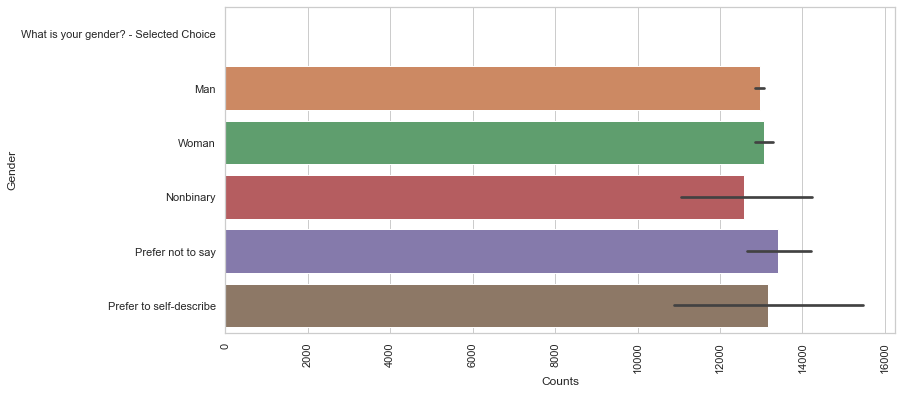

In [47]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=Q2)
plt.xticks(rotation = 90)
plt.xlabel("Counts")
plt.ylabel("Gender")
plt.gcf().set_size_inches(12,6)

In [54]:
Q7= {}
for i in range(1,13):
    Q7.update(dict(responses_df_2021[f"Q7_Part_{i}"].value_counts()))
Q7 = pd.DataFrame(Q7.items(), columns = ['languague', 'counts'])
Q7

,languague,counts
0,Python,21860
1,What programming languages do you use on a reg...,1
2,R,5334
3,What programming languages do you use on a reg...,1
4,SQL,10756
5,What programming languages do you use on a reg...,1
6,C,4709
7,What programming languages do you use on a reg...,1
8,C++,5535
9,What programming languages do you use on a reg...,1


In [55]:
Q7= {}
for i in range(1,13):
    Q7.update(dict(responses_df_2021[f"Q7_Part_{i}"].value_counts()))

In [56]:
Q7

{'Python': 21860,
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python': 1,
 'R': 5334,
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R': 1,
 'SQL': 10756,
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL': 1,
 'C': 4709,
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C': 1,
 'C++': 5535,
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++': 1,
 'Java': 4769,
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java': 1,
 'Javascript': 4332,
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript': 1,
 'Julia': 305,
 'What programming languages do you use on a regular basis? (Select all that app

In [57]:
nigeria = responses_df_2021[responses_df_2021["Q3"] =="Nigeria"]

In [58]:
prog_lang_ng = pd.DataFrame(nigeria.loc[:,list(nigeria.columns[7:20])].count(), columns=["count"])
prog_lang_ng["programming language"] = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 
                'Javascript', 'Julia', 'Swift','Bash', 'MATLAB', 'None', 'Other']
prog_lang_ng.sort_values(by = "count", inplace = True, ascending = False)

prog_lang_ng["percentage (%)"] = (prog_lang_ng["count"]/
                              prog_lang_ng["count"].sum()) * 100  

prog_lang_ng = prog_lang_ng.round(decimals=1)
prog_lang_ng

,count,programming language,percentage (%)
Q7_Part_1,565,Python,44.5
Q7_Part_3,227,SQL,17.9
Q7_Part_7,113,Javascript,8.9
Q7_Part_2,105,R,8.3
Q7_Part_11,55,MATLAB,4.3
Q7_Part_6,53,Java,4.2
Q7_Part_5,52,C++,4.1
Q7_OTHER,42,Other,3.3
Q7_Part_4,30,C,2.4
Q7_Part_12,14,None,1.1


In [61]:
Q7= {}
for i in range(1,13):
    Q7.update(dict(nigeria[f"Q7_Part_{i}"].value_counts()))
Q7 = pd.DataFrame(Q7.items(), columns = ['language', 'count'])
Q7

,language,count
0,Python,565
1,R,105
2,SQL,227
3,C,30
4,C++,52
5,Java,53
6,Javascript,113
7,Julia,1
8,Swift,3
9,Bash,10


# The code below does not consider "other"

I think it has to include a number, hence why other is not there

https://www.kaggle.com/ajaypalsinghlo/kaggle-survey-2021#India

In [69]:
Q7= {}
for i in range(1,13):
    Q7.update(dict(nigeria[f"Q7_Part_{i}"].value_counts()))
Q7 = pd.DataFrame(Q7.items(), columns = ['language', 'count'])


Q7["percentage (%)"] = (Q7["count"]/
                              Q7["count"].sum()) * 100  

Q7 = Q7.round(decimals=1)
Q7.sort_values(by = "percentage (%)", inplace = True, ascending = False)
Q7

,language,count,percentage (%)
0,Python,565,46.0
2,SQL,227,18.5
6,Javascript,113,9.2
1,R,105,8.6
10,MATLAB,55,4.5
5,Java,53,4.3
4,C++,52,4.2
3,C,30,2.4
11,None,14,1.1
9,Bash,10,0.8


In [70]:
Q7.items()

<generator object DataFrame.items at 0x000001DC008FD2E0>